In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('/kaggle/input/diamonds/diamonds.csv')

df.head()

/kaggle/input/diamonds/diamonds.csv


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df = df.rename(columns={'Unnamed: 0': 'Index'})

In [3]:
df = df.drop('Index', axis=1)

In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [8]:
count_zero = (df[['x','y','z']]==0).sum()

print(count_zero)

x     8
y     7
z    20
dtype: int64


In [9]:
index_dim = df[(df[['x','y','z']]==0).any(axis=1)].index

df.drop(index_dim, inplace = True)

count_zero = (df[['x','y','z']]==0).sum()

print(count_zero)

x    0
y    0
z    0
dtype: int64


In [10]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


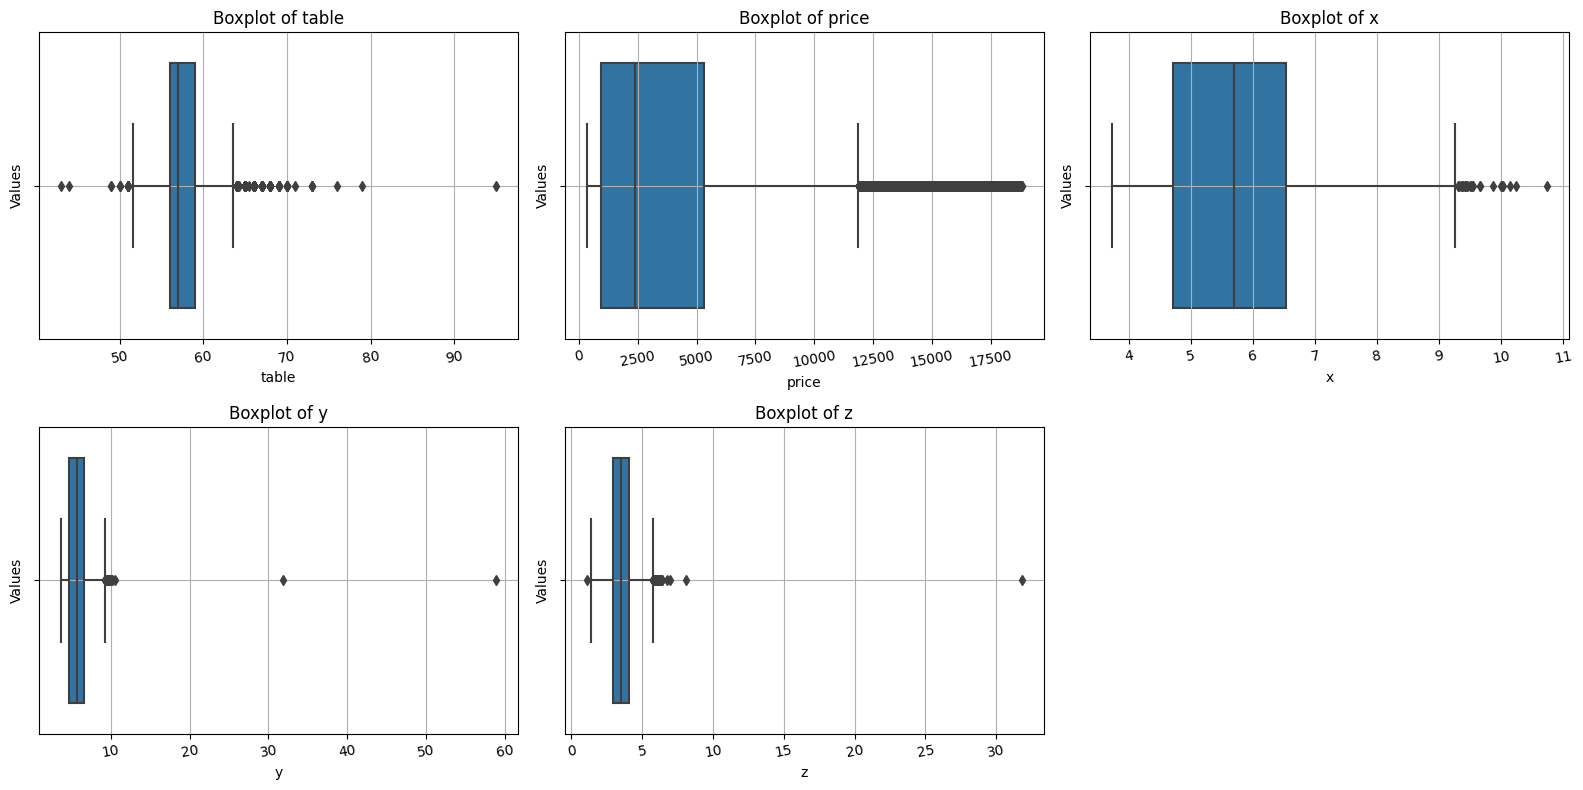

In [11]:
boxplot_columns = ['table','price','x','y','z']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,8))

axes = axes.flatten()

for i, col in enumerate(boxplot_columns):
    sns.boxplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Values")
    axes[i].tick_params(axis='x', rotation=10)
    axes[i].grid(True)

plt.tight_layout()
axes[-1].axis('off')

plt.show()

In [12]:
columns_percent = ['table','price','x','y','z']

for col in columns_percent:
  percentile25 = df[col].quantile(0.25)
  percentile75 = df[col].quantile(0.75)
  IQR = percentile75 - percentile25

  lower_limit = percentile25 - (1.5*IQR)
  upper_limit = percentile75 + (1.5*IQR)
  print(f"Column: {col}")
  print(f"Lower Limit: {lower_limit}")
  print(f"Upper Limit: {upper_limit}")

  upper_limit_len = df[df[col] > upper_limit]
  print('The outliers above the upper limit in', col,'are:', len(upper_limit_len))

  lower_limit_len = df[df[col] < lower_limit]
  print('The outliers below the lower limit in', col,'are:', len(lower_limit_len))
  print('--------------------------------------------------------------------')

  Outliers_Indexes = list(upper_limit_len.index)

len_df = len(df)
print('Numbers of rows in the dataframe are:',len_df)

df = df.drop(Outliers_Indexes)
print('Numbers of rows in the dataframe after removing outliers are:',len(df))

Column: table
Lower Limit: 51.5
Upper Limit: 63.5
The outliers above the upper limit in table are: 588
The outliers below the lower limit in table are: 16
--------------------------------------------------------------------
Column: price
Lower Limit: -5612.375
Upper Limit: 11884.625
The outliers above the upper limit in price are: 3532
The outliers below the lower limit in price are: 0
--------------------------------------------------------------------
Column: x
Lower Limit: 1.9649999999999999
Upper Limit: 9.285
The outliers above the upper limit in x are: 24
The outliers below the lower limit in x are: 0
--------------------------------------------------------------------
Column: y
Lower Limit: 1.9899999999999993
Upper Limit: 9.27
The outliers above the upper limit in y are: 22
The outliers below the lower limit in y are: 0
--------------------------------------------------------------------
Column: z
Lower Limit: 1.2150000000000003
Upper Limit: 5.734999999999999
The outliers above t

In [13]:
print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [14]:
order_cut = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

order_color = {
    'J': 1,
    'I': 2,
    'H': 3,
    'G': 4,
    'F': 5,
    'E': 6,
    'D': 7
}

order_clarity = {
    'SI2': 1,
    'SI1': 2,
    'VS2': 3,
    'VS1': 4,
    'VVS2': 5,
    'VVS1': 6,
    'I1': 7,
    'IF': 8,
}

df['cut'] = df['cut'].map(order_cut)
df['color'] = df['color'].map(order_color)
df['clarity'] = df['clarity'].map(order_clarity)

df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,3,1,5,62.8,57.0,336,3.94,3.96,2.48
6,0.24,3,2,6,62.3,57.0,336,3.95,3.98,2.47
7,0.26,3,3,2,61.9,55.0,337,4.07,4.11,2.53
8,0.22,1,6,3,65.1,61.0,337,3.87,3.78,2.49
9,0.23,3,3,4,59.4,61.0,338,4.00,4.05,2.39


In [15]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [16]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

/tmp/ipykernel_13/3636164286.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[column], kde=True, bins=10, palette="bright")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_13/3636164286.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[column], kde=True, bins=10, palette="bright")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_13/3636164286.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.hist

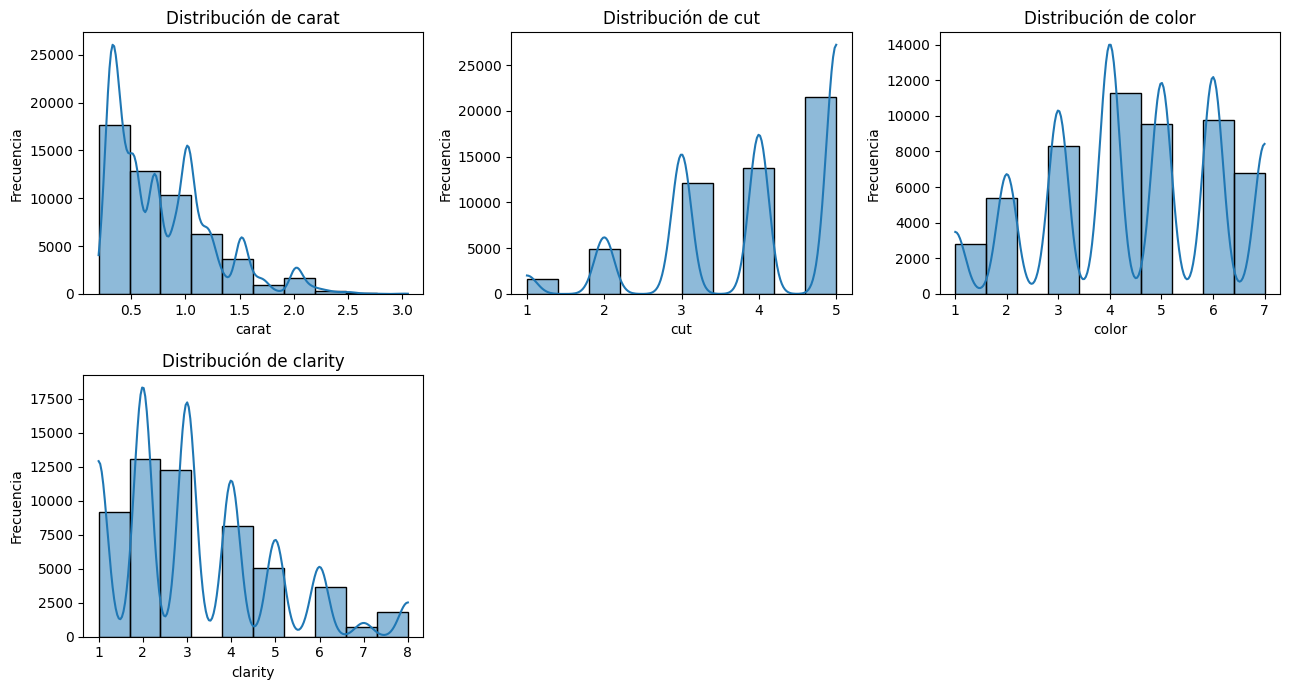

In [17]:
hist_col = ['carat','cut','color','clarity']

plt.figure(figsize=(13, 7))
for index, column in enumerate(hist_col):
    plt.subplot(2, 3, index + 1)
    sns.histplot(df[column], kde=True, bins=10, palette="bright")
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

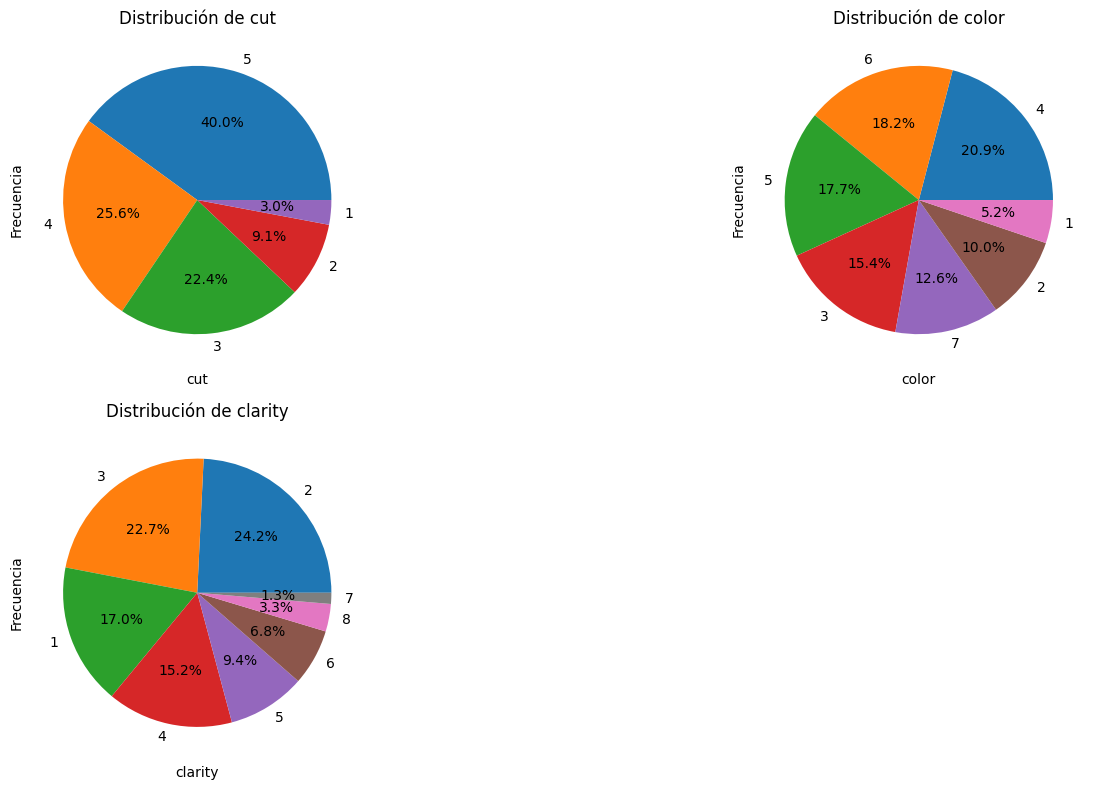

In [18]:
piechart_columns = ['cut','color','clarity']

plt.figure(figsize=(16, 8))

for i, column in enumerate(piechart_columns):
    plt.subplot(2, 2, i+1)
    df[column].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

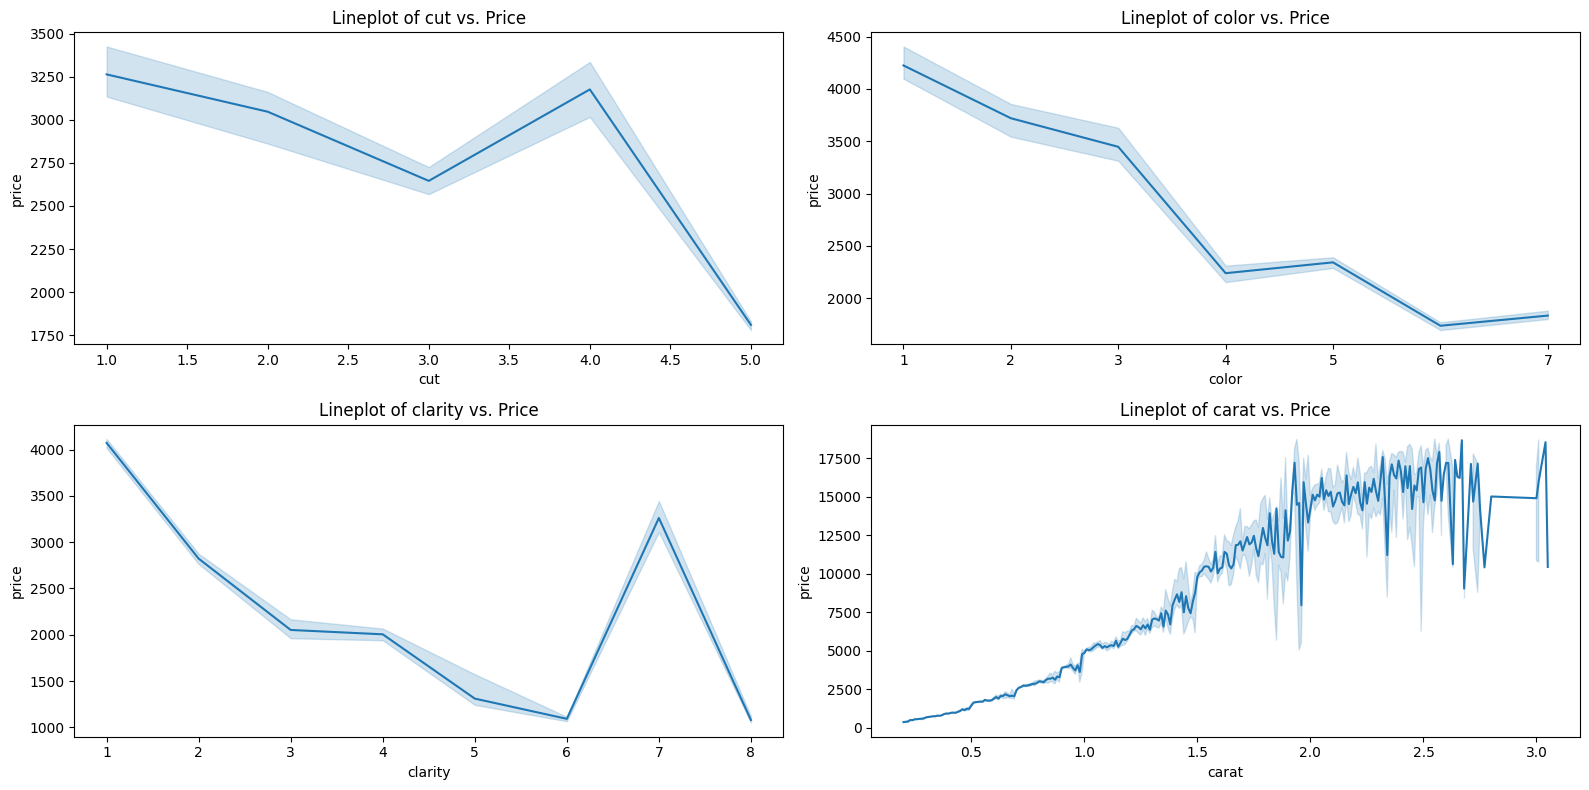

In [19]:
lineplot_columns = ['cut', 'color', 'clarity','carat']

fig, axes3 = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
axes3 = axes3.flatten()


for i, col in enumerate(lineplot_columns):
  sns.lineplot(x=col, y='price', data=df, estimator='median', ax=axes3[i])
  axes3[i].set_title(f'Lineplot of {col} vs. Price')

plt.tight_layout()
plt.show()

In [20]:
df.groupby('clarity')['carat'].mean()

clarity
1    1.076049
2    0.850272
3    0.763492
4    0.727134
5    0.596202
6    0.503131
7    1.224618
8    0.505123
Name: carat, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Price')

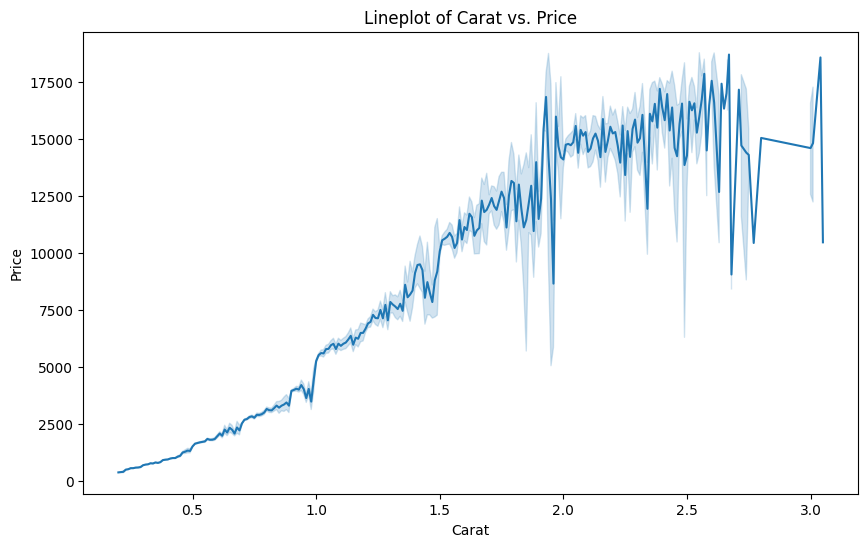

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(x='carat',y='price',data=df)
plt.title('Lineplot of Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')

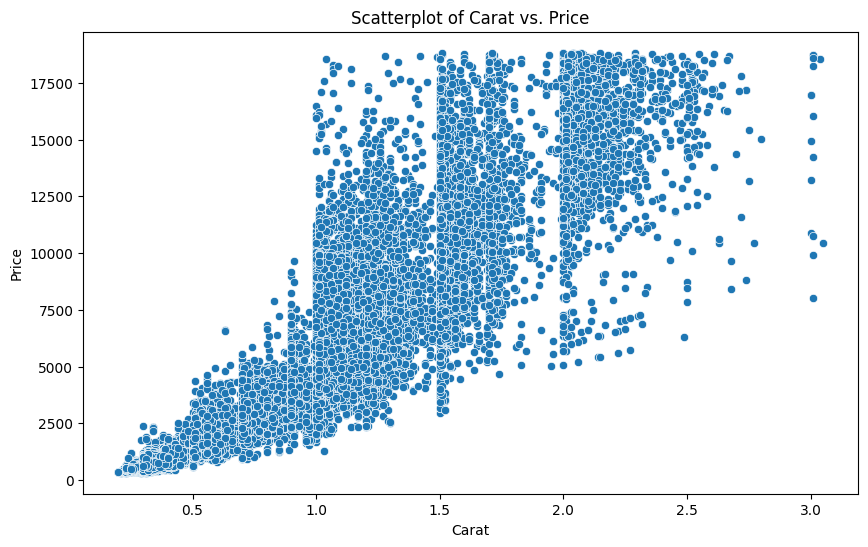

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='carat',y='price',data=df)
plt.title('Scatterplot of Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

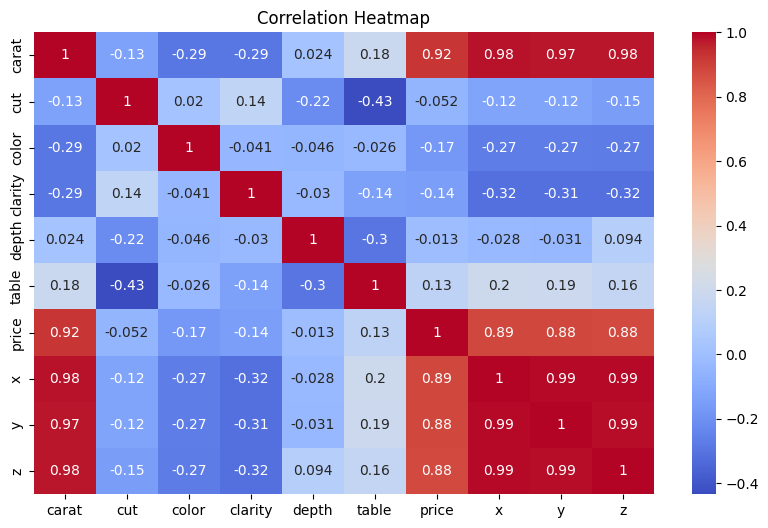

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


regression_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
}

In [25]:
x = df.drop(columns=['price'])
y = df['price']

numeric_var = x.select_dtypes(include=['float64', 'int64']).columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_var)]
)


Best_r2 = 0
Best_mod = None


for model_name, model in regression_models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    pipe.fit(x_train, y_train)

    y_pred = pipe.predict(x_test)

    rmse = mean_squared_error(y_test, y_pred)  # RMSE
    r2 = r2_score(y_test, y_pred)

    if r2 > Best_r2:
        Best_r2 = r2
        Best_mod = model

    print(f'Modelo: {model_name}, R2: {r2}')  # Imprimir R2 por modelo

print("\nBest Model:", Best_mod)
print("Best Model R2:", Best_r2)

Modelo: Linear Regression, R2: 0.8947185420336132
Modelo: Random Forest, R2: 0.9814411596422384
Modelo: XGBoost, R2: 0.98151425414655

Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Best Model R2: 0.98151425414655


In [26]:
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

RMSE: 538.0619799215455


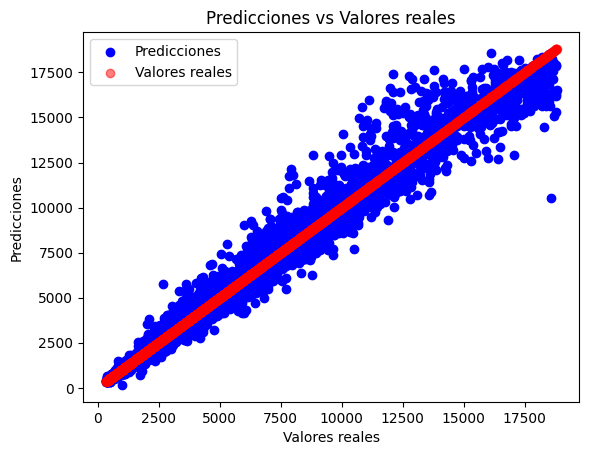

In [27]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', label='Predicciones')

plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Valores reales')

plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')

plt.legend()

plt.show()

   Feature  Importance
2    color    0.035503
8        z    0.043257
3  clarity    0.068631
0    carat    0.328582
7        y    0.511582


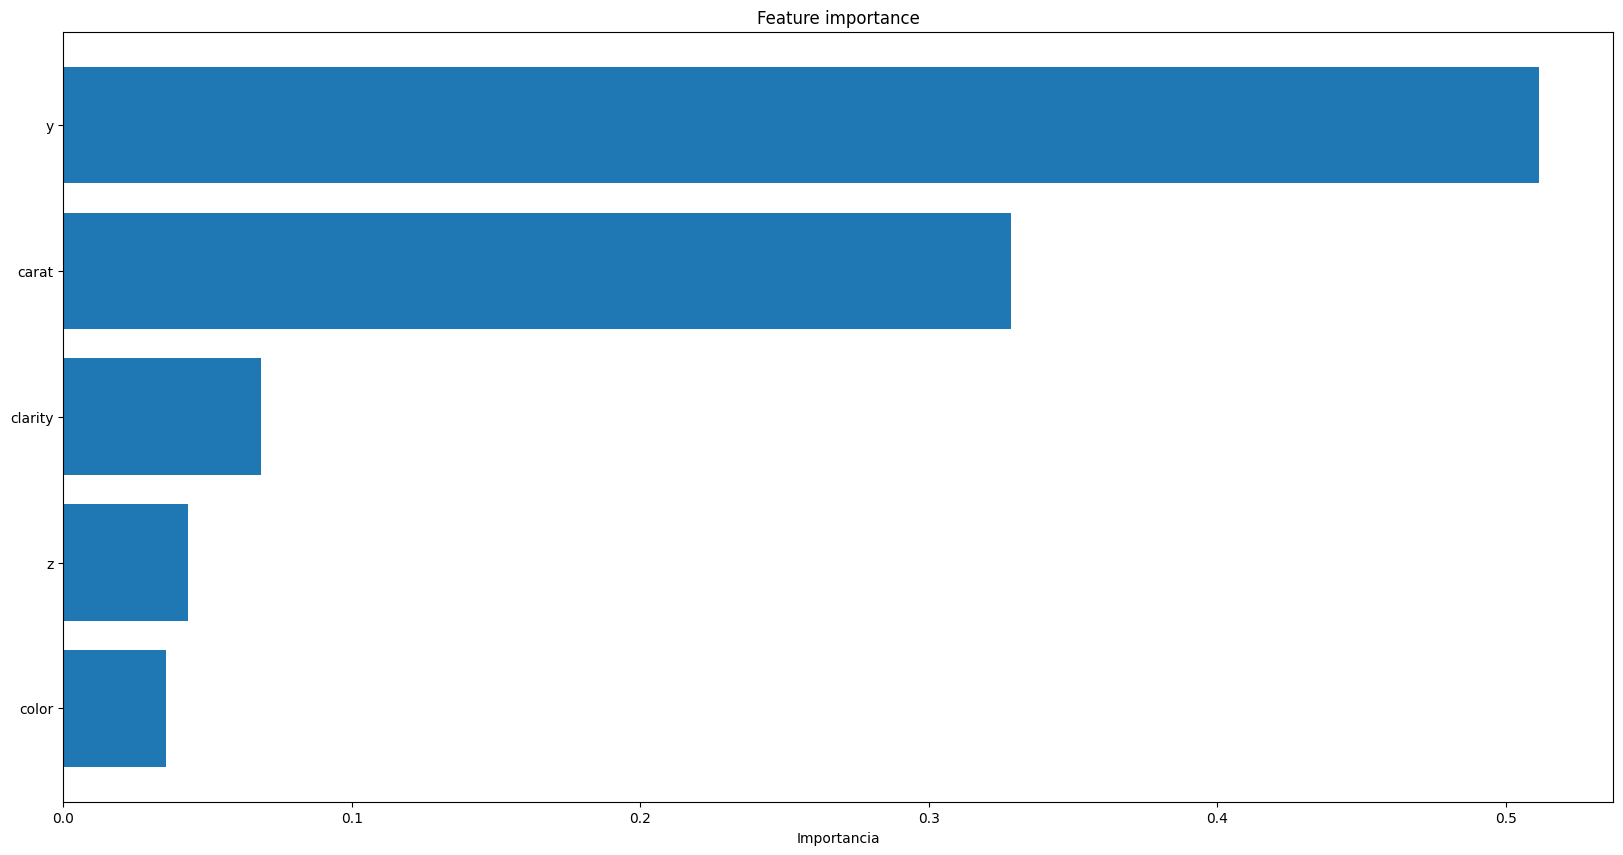

In [28]:
feature_importances = Best_mod.feature_importances_

feature_names = numeric_var.tolist()


import pandas as pd
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})


importance_df = importance_df.sort_values(by='Importance', ascending=True).tail(5)


print(importance_df)



import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importancia')
plt.title('Feature importance')
plt.show()
